In [1]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import epps_singleton_2samp as epps
import statsmodels
import statsmodels.api as sm
import seaborn as sns

Formatter for the visualizations

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [ ]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
# sns.set_context("paper", font_scale=1.5)

In [3]:
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "expon", "exponnorm", "lognorm"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [4]:
def use_fitter(data):
    # Initialize the fitter object
    # f = Fitter(data, distributions='common')
    f = Fitter(data)

    # Fit common distributions
    f.fit(get_common_distributions())

    # Print the summary of the fitted distributions
    print(f.summary())

    print (f.get_best(method = 'sumsquare_error'))
    print (f.get_best(method = 'aic'))
    print (f.get_best(method = 'bic'))
    # print (f.get_best(method = 'kl_div'))
    print (f.get_best(method = 'ks_statistic'))
    print (f.get_best(method = 'ks_pvalue'))

In [ ]:
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
# Link to the statistical code

# MTTU

In [6]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttu"), "mttu.csv")
print (data_file)
df_combined = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'out_of_date_duration', 'ratio', 'avg_total_duration', 'avg_out_of_date_duration', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'out_of_date_duration', 'ratio', 'dependents_approx']
rows = df_combined.shape[0]
print (df_combined.shape)
display(df_combined.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttu/mttu.csv
(163207, 8)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,CARGO,a10,397,0,0.000000,397.0,0.0,0.000000
1,CARGO,aarch64,481,325,0.675676,481.0,325.0,0.675676
2,CARGO,aardvark-dns,618,0,0.000000,618.0,0.0,0.000000
3,CARGO,ab-av1,582,100,0.171821,582.0,100.0,0.171821
4,CARGO,ab_glyph,3084,78,0.025292,1542.0,39.0,0.025292


In [7]:
df_combined.describe()

,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
count,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000
mean,6024.428327,1747.233685,0.243337,1123.233461,288.631763,0.243337
std,9226.808900,4474.219767,0.286019,626.748876,424.599834,0.286019
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1550.000000,0.000000,0.000000,701.000000,0.000000,0.000000
50%,3262.000000,387.000000,0.122032,1056.250000,95.000000,0.122032
75%,7027.000000,1721.000000,0.427573,1462.000000,426.000000,0.427573
max,482807.000000,296407.000000,1.000000,4871.000000,4296.000000,1.000000


In [8]:
df_combined = df_combined.dropna()

/tmp/ipykernel_133730/1876456980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined, y='avg_out_of_date_duration', x='system_name', inner='quartile',


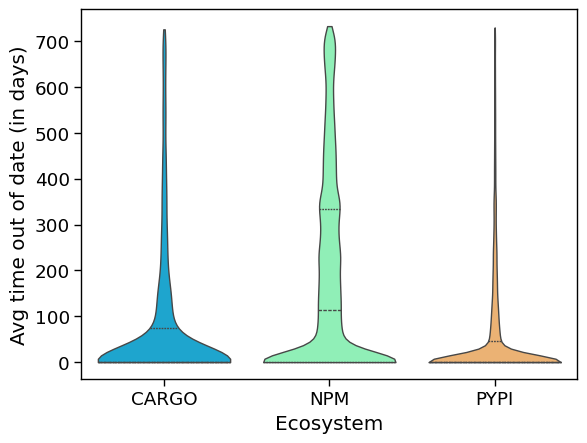

In [10]:
ax = sns.violinplot(data=df_combined, y='avg_out_of_date_duration', x='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "time-out-of-date-from-db"), "time_out_of_date_combined.pdf")

ax.set_ylabel('Avg time out of date (in days)')
ax.set_xlabel('Ecosystem')
# plt.title('Time out of date (all pkgs)\n')
plt.savefig(data_file)


/tmp/ipykernel_376179/2631486434.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined, y='avg_ratio', x='system_name', inner='quartile',


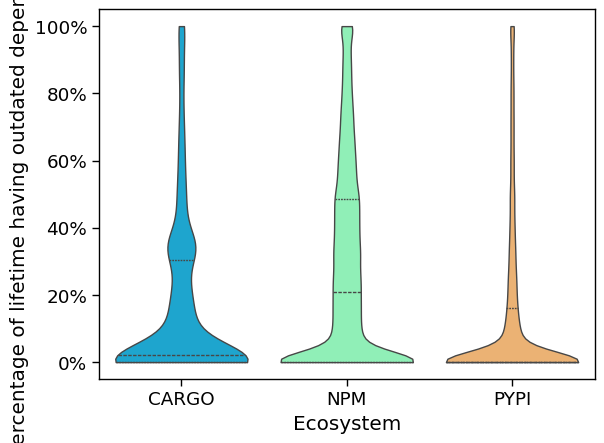

In [9]:
ax = sns.violinplot(data=df_combined, y='avg_ratio', x='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "time-out-of-date-from-db"), "time_out_of_date_combined_ratio.pdf")

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Ecosystem')
ax.set_ylabel('Percentage of lifetime having outdated dependency')
# plt.title('Time out of date (all pkgs)\n')
plt.savefig(data_file)

In [12]:
for system_name in df_combined.system_name.unique():
    print (system_name)

CARGO
NPM
PYPI


Cumulative Percentage Graph

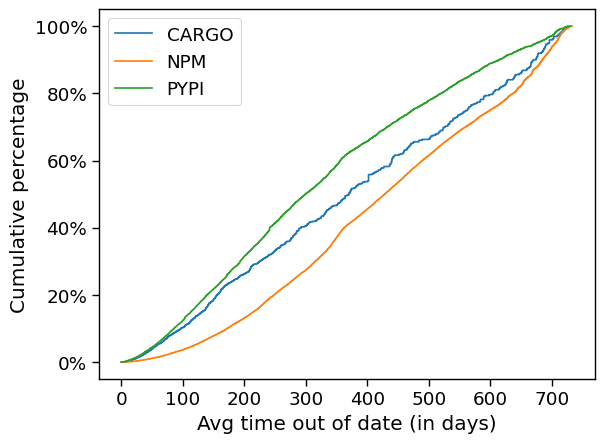

In [13]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "time-out-of-date-from-db"), "cum_percentage_tood.pdf")

for system_name in df_combined.system_name.unique():
    df_cpg = df_combined[df_combined['system_name']==system_name].sort_values(by='avg_out_of_date_duration')
    df_cpg['cumulative_sum'] = df_cpg['avg_out_of_date_duration'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_out_of_date_duration'].sum()
    plt.plot(df_cpg['avg_out_of_date_duration'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
plt.xlabel('Avg time out of date (in days)')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph')
plt.legend()
plt.savefig(data_file)

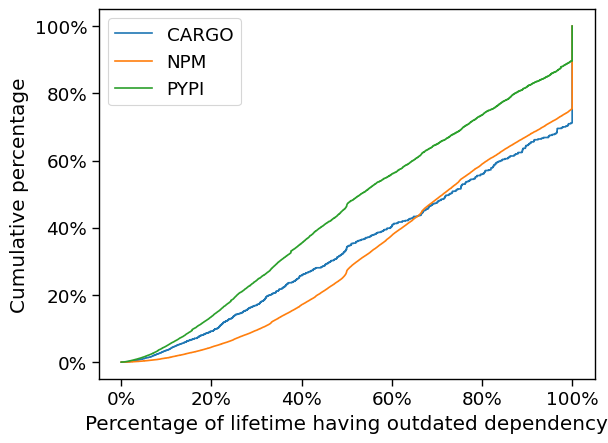

In [14]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "time-out-of-date-from-db"), "cum_percentage_ratio.pdf")
for system_name in df_combined.system_name.unique():
    df_cpg = df_combined[df_combined['system_name']==system_name].sort_values(by='avg_ratio')
    df_cpg['cumulative_sum'] = df_cpg['avg_ratio'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_ratio'].sum()
    plt.plot(df_cpg['avg_ratio'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)


ax.yaxis.set_major_formatter(append_percentage)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Percentage of lifetime having outdated dependency')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph')
plt.legend()
plt.savefig(data_file)

# MTTU (maintained)

In [20]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttu"), "mttu.csv")
print (data_file)
df_combined_maintained = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'out_of_date_duration', 'ratio', 'avg_total_duration', 'avg_out_of_date_duration', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'out_of_date_duration', 'ratio', 'dependents_approx']
rows = df_combined_maintained.shape[0]
print (df_combined_maintained.shape)
display(df_combined_maintained.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttu/mttu.csv
(163207, 8)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,CARGO,a10,397,0,0.000000,397.0,0.0,0.000000
1,CARGO,aarch64,481,325,0.675676,481.0,325.0,0.675676
2,CARGO,aardvark-dns,618,0,0.000000,618.0,0.0,0.000000
3,CARGO,ab-av1,582,100,0.171821,582.0,100.0,0.171821
4,CARGO,ab_glyph,3084,78,0.025292,1542.0,39.0,0.025292


In [21]:
df_combined_maintained = df_combined_maintained.dropna()

In [22]:
df_combined_maintained

,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,CARGO,a10,397,0,0.000000,397.000000,0.000000,0.000000
1,CARGO,aarch64,481,325,0.675676,481.000000,325.000000,0.675676
2,CARGO,aardvark-dns,618,0,0.000000,618.000000,0.000000,0.000000
3,CARGO,ab-av1,582,100,0.171821,582.000000,100.000000,0.171821
4,CARGO,ab_glyph,3084,78,0.025292,1542.000000,39.000000,0.025292
...,...,...,...,...,...,...,...,...
163202,PYPI,zygoat-django,8512,1447,0.169995,1418.666667,241.166667,0.169995
163203,PYPI,zyte-api,5750,0,0.000000,821.428571,0.000000,0.000000
163204,PYPI,zython,2608,0,0.000000,1304.000000,0.000000,0.000000
163205,PYPI,zytlib,5659,0,0.000000,943.166667,0.000000,0.000000


In [8]:
df_combined_maintained.groupby('system_name')['avg_out_of_date_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
system_name,,,,,,,,
CARGO,3301.0,130.537013,265.329598,0.0,0.0,12.5,129.000000,2596.0
NPM,117129.0,344.657634,449.780841,0.0,0.5,174.0,517.823529,4296.0
PYPI,42777.0,147.425425,313.079576,0.0,0.0,0.0,133.545455,3239.0


In [9]:
get_best_distribution(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_out_of_date_duration'].sort_values().to_numpy())

p value for norm = 9.599984915731609e-285
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 0.0
p value for expon = 0.0
p value for exponnorm = 0.0
p value for lognorm = 0.0
Best fitting distribution: norm
Best p value: 9.599984915731609e-285
Parameters for the best fit: (130.53701327087256, 265.2894053990791)


/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


('norm', 9.599984915731609e-285, (130.53701327087256, 265.2894053990791))

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

Fitting 114 distributions:   1%|          | 1/114 [01:13<2:18:57, 73.78s/it]2024-09-25 18:19:03.495 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-25 18:19:03.504 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.00533)
2024-09-25 18:19:03.542 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.006711)
2024-09-25 18:19:03.569 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gibrat distribution with error=0.003701)
2024-09-25 18:19:03.584 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=0.006668)
2024-09-25 18:19:03.618 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=0.006678)
Fitting 114 distributions:   5%|▌         | 6/114 [01:13<16:20,  9.08s/it]  2024-09-25 18:19:03.620 | WARNING  | fitter.fitter:_fit_sing

             sumsquare_error          aic          bic  kl_div  ks_statistic  \
lomax               0.000710  1896.465767  1914.200838     inf      0.567974   
ncf                 0.001136  1817.269814  1846.828266     inf      0.567974   
fisk                0.001418  1823.376251  1841.111323     inf      0.567974   
halfgennorm         0.001496  1948.469811  1966.204882     inf      0.567974   
genpareto           0.001636  1787.060169  1804.795240     inf      0.567974   

             ks_pvalue  
lomax              0.0  
ncf                0.0  
fisk               0.0  
halfgennorm        0.0  
genpareto          0.0  
{'lomax': {'c': 0.6898658638439554, 'loc': -2.4882737598157645e-09, 'scale': 1.7651989046261458}}
{'vonmises': {'kappa': 1.4619145377070653, 'loc': 0.01636170096886147, 'scale': 1}}
{'vonmises': {'kappa': 1.4619145377070653, 'loc': 0.01636170096886147, 'scale': 1}}
{'rdist': {'c': 33709.83313115395, 'loc': 76.84173867461823, 'scale': 27872.992085309976}}
{'alpha': {'

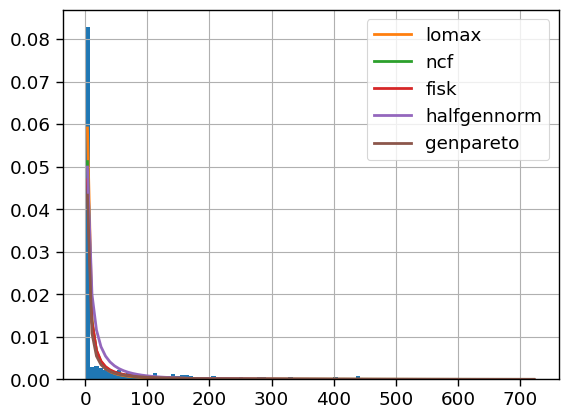

In [23]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_out_of_date_duration'].sort_values().to_numpy())

In [24]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'avg_out_of_date_duration'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]2024-09-25 18:20:23.283 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-25 18:20:23.359 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.001848)
Fitting 114 distributions:   3%|▎         | 3/114 [00:00<00:20,  5.45it/s]2024-09-25 18:20:23.816 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=0.002134)
2024-09-25 18:20:23.854 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.002041)
2024-09-25 18:20:23.868 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=0.001775)
2024-09-25 18:20:23.878 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.002054)
2024-09-25 18:20:23.920 | INFO     | fitter.fitter:_fit_single_di

Fitting 111 distributions:   2%|▏         | 2/111 [00:32<33:39, 18.52s/it]2024-01-28 19:10:56.280 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
2024-01-28 19:10:56.301 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-01-28 19:10:56.401 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▌         | 6/111 [00:32<06:31,  3.73s/it]2024-01-28 19:10:56.467 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
2024-01-28 19:10:56.467 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED bradford distribution (taking more than 30 seconds)
Fitting 111 distributions:  13%|█▎        | 14/111 [00:35<00:54,  1.78it/s]2024-01-28 19:11:26.553 | WARNING  | fitter.fitter:_fit_single_distribut

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon            0.000230  4109.109290  4128.644100     inf      0.661683   
pareto           0.000230  4111.109179  4140.411394     inf      0.661683   
laplace          0.000314  4247.738726  4267.273536     inf      0.500000   
gumbel_r         0.000340  4279.673066  4299.207876     inf      0.394851   
logistic         0.000372  4372.067685  4391.602495     inf      0.383153   

          ks_pvalue  
expon           0.0  
pareto          0.0  
laplace         0.0  
gumbel_r        0.0  
logistic        0.0  
{'expon': {'loc': 0.0, 'scale': 108.54991074935204}}
{'vonmises': {'kappa': 1.8139532173621369, 'loc': 0.01952414825583615, 'scale': 1}}
{'vonmises': {'kappa': 1.8139532173621369, 'loc': 0.01952414825583615, 'scale': 1}}
{'norm': {'loc': 108.54991074935204, 'scale': 284.4959092915413}}
{'expon': {'loc': 0.0, 'scale': 108.54991074935204}}


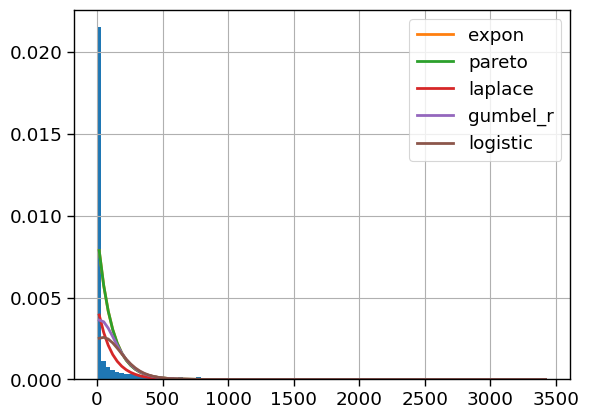

In [12]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'avg_out_of_date_duration'].sort_values().to_numpy())

Fitting 111 distributions:   2%|▏         | 2/111 [00:32<33:47, 18.60s/it]2024-01-28 19:19:35.253 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
2024-01-28 19:19:35.311 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▍         | 5/111 [00:33<07:33,  4.28s/it]2024-01-28 19:19:35.455 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-01-28 19:19:35.510 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 111 distributions:  13%|█▎        | 14/111 [00:38<01:29,  1.09it/s]2024-01-28 19:20:05.575 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED cosine distribution (taking more than 30 seconds)
2024-01-28 19:20:05.647 | WARNING  | fitter.fitter:_fit_single_distribution

          sumsquare_error          aic          bic    kl_div  ks_statistic  \
expon            0.000043  2096.738940  2121.187894  0.289576      0.298174   
gumbel_r         0.000055  2190.587030  2215.035983  0.391174      0.170288   
laplace          0.000055  2198.022341  2222.471294  0.392139      0.319071   
rayleigh         0.000057  2303.551407  2328.000361  0.424801      0.214345   
logistic         0.000058  2253.407783  2277.856737  0.433368      0.245758   

          ks_pvalue  
expon           0.0  
gumbel_r        0.0  
laplace         0.0  
rayleigh        0.0  
logistic        0.0  
{'expon': {'loc': 0.0, 'scale': 538.3359518576809}}
{'vonmises': {'kappa': 0.6447690425642607, 'loc': 0.011480867800855332, 'scale': 1}}
{'vonmises': {'kappa': 0.6447690425642607, 'loc': 0.011480867800855332, 'scale': 1}}
{'gumbel_r': {'loc': 246.4694184511407, 'scale': 424.604929060735}}
{'expon': {'loc': 0.0, 'scale': 538.3359518576809}}


/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


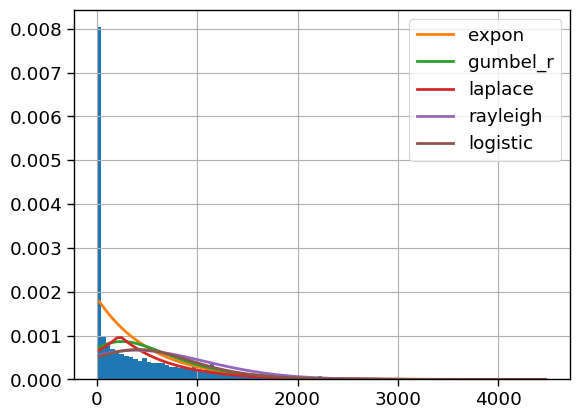

In [13]:
use_fitter(df_combined_maintained['avg_out_of_date_duration'].sort_values().to_numpy())

/tmp/ipykernel_929500/3913576147.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_out_of_date_duration', y='system_name', inner='quartile',


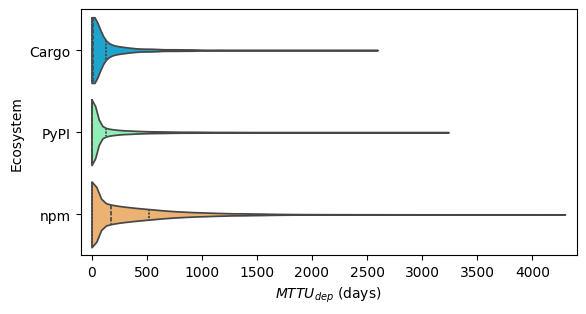

In [23]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
# Reorder the violin plots to show CARGO, PYPI, NPM
custom_order = ['CARGO', 'PYPI', 'NPM']
df_combined_maintained['system_name'] = pd.Categorical(df_combined_maintained['system_name'], custom_order)

# Create a mapping dictionary for the display names
name_mapping = {'CARGO': 'Cargo', 'PYPI': 'PyPI', 'NPM': 'npm'}
df_combined_maintained['system_name'] = df_combined_maintained['system_name'].map(name_mapping)


ax = sns.violinplot(data=df_combined_maintained, x='avg_out_of_date_duration', y='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg.pdf")

ax.set_xbound(-100, 4400)
ax.set_xlabel('$MTTU_{dep}$ (days)')
ax.set_ylabel('Ecosystem')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

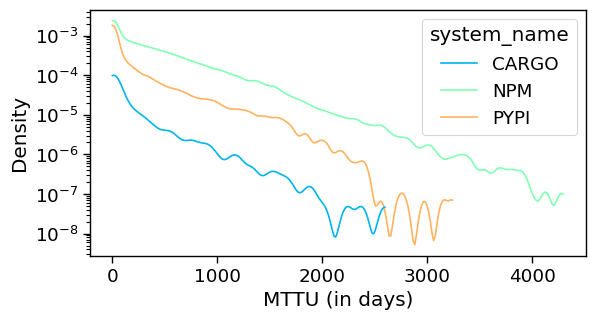

In [ ]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_out_of_date_duration', hue='system_name',
                palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg_kde.pdf")

ax.set_ylabel('Density')
ax.set_xlabel('$MTTU_dep$ (in days)')
ax.set_yscale('log')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

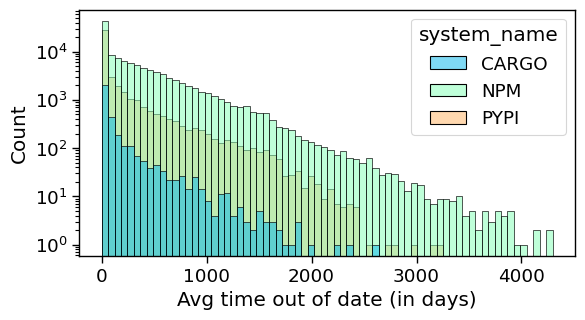

In [19]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.histplot(data=df_combined_maintained, x='avg_out_of_date_duration', hue='system_name',
                palette='rainbow', bins=70)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg_hist.pdf")

# ax.set_ylabel('Density')
ax.set_xlabel('Avg time out of date (in days)')
ax.set_yscale('log')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-25 18:52:06.159 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
Fitting 114 distributions:   1%|          | 1/114 [00:03<06:52,  3.65s/it]2024-09-25 18:52:06.195 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=2981.787523)
2024-09-25 18:52:06.218 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=3547.209035)
2024-09-25 18:52:06.219 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=3450.498201)
2024-09-25 18:52:06.243 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=3547.209035)
2024-09-25 18:52:06.282 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=3454.172454)
Fitting 114 distributions:   5%|▌         | 6/114 [00:03<00:50,  2.13it/s]2024-09-25 18:52:06.288 | INFO     | fitter.fitt

             sumsquare_error         aic         bic    kl_div  ks_statistic  \
halfgennorm       534.270248  865.322384  883.057455  0.626532      0.567974   
loglaplace       1061.980616  904.470154  922.205226  0.373514      0.567974   
burr12           1308.704142  377.291488  400.938250  0.624222      0.567974   
exponpow         1398.211971  573.937877  591.672948  0.630649      0.567974   
erlang           1581.818755  528.111445  545.846516  0.592679      0.567973   

             ks_pvalue  
halfgennorm        0.0  
loglaplace         0.0  
burr12             0.0  
exponpow           0.0  
erlang             0.0  
{'halfgennorm': {'beta': 0.3019622539289071, 'loc': -5.75611498610042e-13, 'scale': 0.00015422628222104242}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'loggamma': {'c': 1827.9866798083594, 'loc': -92.38712923927665, 'scale': 12.321653719026273}}
{'alpha': {'a': 2.021526240540396, 'loc': -3.569416580010539e-19, 'scale': 9.6675093

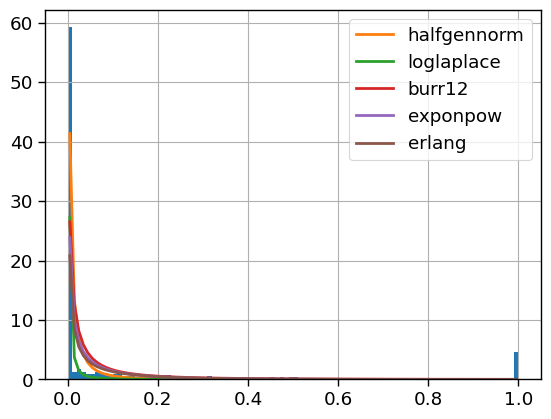

In [14]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]2024-09-25 18:52:38.458 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-25 18:52:38.539 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=1061.422602)
2024-09-25 18:52:38.906 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=1151.856393)
Fitting 114 distributions:   3%|▎         | 3/114 [00:00<00:17,  6.44it/s]2024-09-25 18:52:38.951 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=1047.961826)
2024-09-25 18:52:39.001 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=1145.74036)
2024-09-25 18:52:39.002 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=1162.821474)
2024-09-25 18:52:39.003 | INFO     | fitter.fitter:_f

              sumsquare_error         aic         bic    kl_div  ks_statistic  \
levy               210.788949  464.051982  483.278573  0.735225      0.444756   
invgauss           242.387853  432.692573  461.532459  0.745310      0.430581   
norminvgauss       242.950632  432.008581  470.461763  0.746121      9.788766   
burr12             326.549160  363.004606  401.457788  0.598762      0.358267   
halfgennorm        437.674290  254.661799  283.501685  0.693666      0.315337   

              ks_pvalue  
levy                0.0  
invgauss            0.0  
norminvgauss        0.0  
burr12              0.0  
halfgennorm         0.0  
{'levy': {'loc': -0.00107695034323335, 'scale': 0.00330750188037087}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'dweibull': {'c': 1.8093903610641071, 'loc': 0.36737200972856815, 'scale': 0.34091412009319344}}
{'alpha': {'a': 1.9555530290246886e-08, 'loc': -0.07196637777404638, 'scale': 0.11724303163407382}}


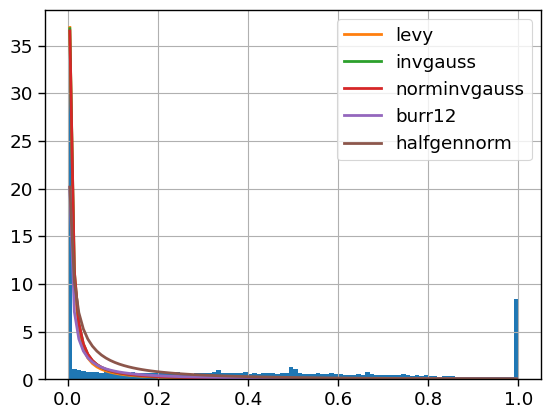

In [15]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   3%|▎         | 3/114 [00:01<00:56,  1.96it/s]2024-09-25 19:00:03.586 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED halfcauchy distribution (taking more than 30 seconds)
2024-09-25 19:00:04.214 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted genhalflogistic distribution with error=3760.942579)
Fitting 114 distributions:   4%|▍         | 5/114 [00:02<00:43,  2.48it/s]2024-09-25 19:00:04.252 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halflogistic distribution with error=3760.51511)
2024-09-25 19:00:04.278 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfnorm distribution with error=3914.911993)
2024-09-25 19:00:04.491 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted hypsecant distribution with error=3891.424407)
Fitting 114 distributions:  11%|█         | 12/114 [00:03<00:24,  4.15it/s]2024-09-25 19:00:05.824 | INFO     | fitter.fitter:_fit_single_distribution:333 - 

             sumsquare_error          aic          bic    kl_div  \
halfgennorm      1016.624172   588.351668   614.066311  0.487448   
gengamma         1205.961732   911.193876   945.480067  0.480613   
beta             1707.468521  1105.551804  1139.837995  0.634816   
pearson3         1777.352761  1075.416482  1101.131125  0.823666   
burr12           1915.849090   455.394226   489.680417  0.348731   

             ks_statistic  ks_pvalue  
halfgennorm      0.618524        0.0  
gengamma         0.618524        0.0  
beta             0.618524        0.0  
pearson3         0.618524        0.0  
burr12           0.618524        0.0  
{'halfgennorm': {'beta': 0.23503315197425556, 'loc': -4.798531507321187e-18, 'scale': 2.2065322685465533e-05}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'vonmises': {'kappa': 21.799824081814165, 'loc': 0.10296200145138279, 'scale': 1}}
{'alpha': {'a': 1.9906475673476942, 'loc': -3.9185075188172916e-21, 'scale': 9.169

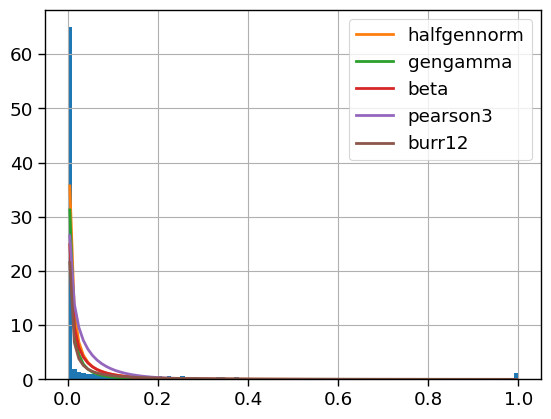

In [16]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-25 19:00:46.350 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-25 19:00:46.401 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=1595.544012)
Fitting 114 distributions:   3%|▎         | 3/114 [00:00<00:08, 13.32it/s]2024-09-25 19:00:46.562 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=1775.485433)
2024-09-25 19:00:46.613 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=1725.478416)
2024-09-25 19:00:46.646 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=1391.302296)
2024-09-25 19:00:46.796 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halflogistic distribution with error=1683.387945)
Fitting 114 distributions:   7%|▋         | 8/114 [00:00<00:10, 10.04it/s]2024-09-25 19:00:47.077 | INFO     |

             sumsquare_error         aic         bic    kl_div  ks_statistic  \
fisk              346.822617  483.699689  513.500433  0.559471      0.397522   
halfgennorm       490.575738  337.199077  366.999821  0.665789      0.397522   
erlang            654.301678  415.142430  444.943174  0.722557      0.397522   
chi2              673.249209  445.175142  474.975886  0.643299      0.397512   
burr12            734.412064  338.245386  377.979711  0.451945      0.397522   

             ks_pvalue  
fisk               0.0  
halfgennorm        0.0  
erlang             0.0  
chi2               0.0  
burr12             0.0  
{'fisk': {'c': 0.5436120508876172, 'loc': -4.796919722758517e-27, 'scale': 0.003041148986417716}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'uniform': {'loc': 0.0, 'scale': 1.0}}
{'weibull_max': {'c': 428.6486664484437, 'loc': 93.31747528403298, 'scale': 93.21228224953347}}
{'alpha': {'a': 1.6230783492882293e-09, 'loc': -0.02763646164191494, 'scale': 0.041931634577922

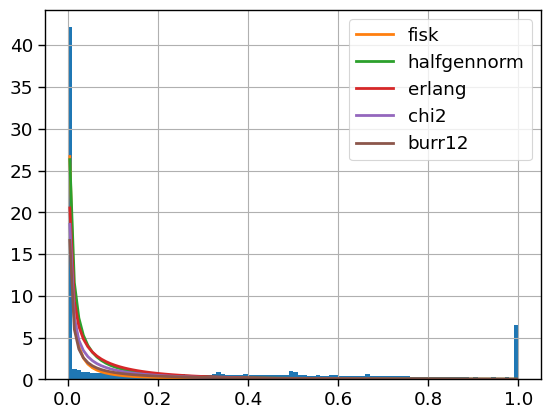

In [17]:
use_fitter(df_combined_maintained['avg_ratio'].sort_values().to_numpy())

/tmp/ipykernel_137379/112160686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)


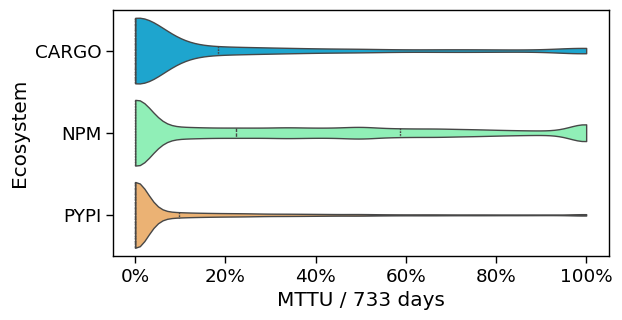

In [18]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg_ratio.pdf")

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Ecosystem')
ax.set_xlabel('MTTU / 733 days')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

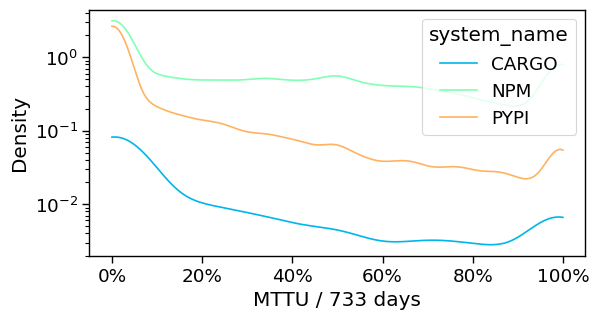

In [19]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_ratio', hue='system_name', palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg_ratio_kde.pdf")

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Density')
ax.set_xlabel('MTTU / 733 days')
ax.set_yscale('log')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

QQ plot

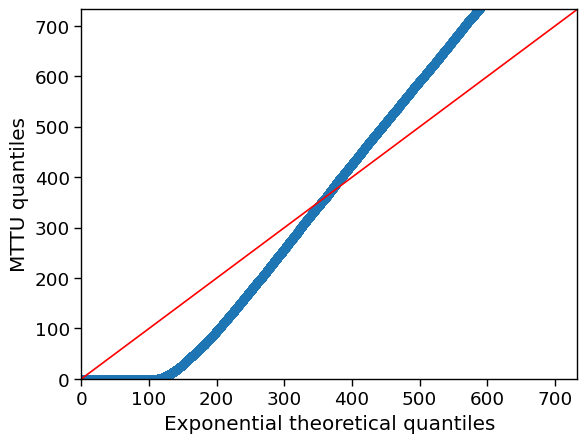

In [20]:
# fig, ax = plt.subplots(figsize=(6.4, 3.2))
loc, scale = stats.expon.fit(df_combined_maintained['avg_out_of_date_duration'].sort_values().to_numpy())
h= sm.qqplot(df_combined_maintained['avg_out_of_date_duration'].sort_values().to_numpy(),
             stats.expon, loc=loc, scale=scale, line='45', markerfacecolor='b')
h.axes[0].set_xlim([0, 733])
h.axes[0].set_ylim([0, 733])
h.axes[0].set_xlabel('Exponential theoretical quantiles')
h.axes[0].set_ylabel('MTTU quantiles')
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_qq_plot.pdf")
plt.savefig(data_file, dpi=300, bbox_inches='tight')

Cumulative Percentage Graph

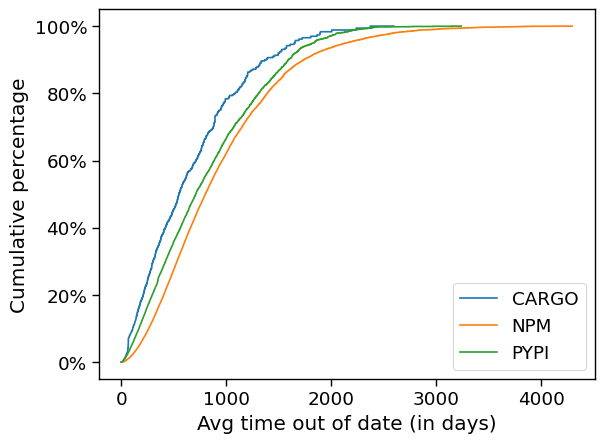

In [21]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "cum_percentage_mttu.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_out_of_date_duration')
    df_cpg['cumulative_sum'] = df_cpg['avg_out_of_date_duration'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_out_of_date_duration'].sum()
    plt.plot(df_cpg['avg_out_of_date_duration'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)


ax.yaxis.set_major_formatter(append_percentage)
plt.xlabel('Avg time out of date (in days)')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

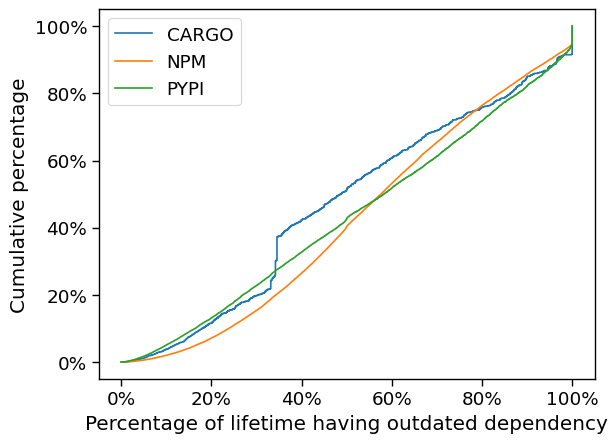

In [22]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "cum_percentage_mttu_ratio.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_ratio')
    df_cpg['cumulative_sum'] = df_cpg['avg_ratio'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_ratio'].sum()
    plt.plot(df_cpg['avg_ratio'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)


ax.yaxis.set_major_formatter(append_percentage)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Percentage of lifetime having outdated dependency')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

## Load MTTU

In [3]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttu"), "mttu_weighted.csv")
print (data_file)
df_tood = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'mttu_expo_weighted', 'mttu_inverse_weighted'],
                )
# df.columns = ['system_name', 'package_name', 'mttu_expo_weighted', 'mttu_inverse_weighted']
rows = df_tood.shape[0]
print (df_tood.shape)
display(df_tood.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttu/mttu_weighted.csv
(123318, 4)


,system_name,from_package_name,mttu_expo_weighted,mttu_inverse_weighted
0,CARGO,aarch64,163.447836,173.998678
1,CARGO,ab-av1,26.166300,28.896919
2,CARGO,ab_glyph,3.542718,2.210279
3,CARGO,abi_stable,120.292295,119.042406
4,CARGO,actix-casbin,0.049948,0.049965


In [4]:
df_tood = df_tood.dropna()

In [5]:
# df_tood = df_tood[df_tood['mttu_inverse_weighted'].round(2) > 0.00] # No need to do this for MTTU

In [5]:
display(df_tood[['system_name', 'mttu_inverse_weighted']].groupby(by=['system_name']).describe())

mttu_inverse_weighted                                        \
                            count       mean        std  min        25%   
system_name                                                               
CARGO                      2314.0  35.112547  69.417579  0.0   1.028669   
NPM                       98962.0  53.073430  80.095840  0.0   5.008718   
PYPI                      22042.0  59.991284  82.791315  0.0  10.768100   

                                                
                   50%        75%          max  
system_name                                     
CARGO        14.760317  39.839826  1285.942425  
NPM          22.018655  69.103296  2653.000000  
PYPI         27.936342  70.839642  1260.990032

In [10]:
display(df_tood[['system_name', 'mttu_expo_weighted']].groupby(by=['system_name']).describe())

/tmp/ipykernel_1675840/2187021706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_tood[['system_name', 'mttu_expo_weighted']].groupby(by=['system_name']).describe())


mttu_expo_weighted                                        \
                         count       mean        std  min        25%   
system_name                                                            
Cargo                   2314.0  30.478568  48.129677  0.0   1.319118   
PyPI                   22042.0  44.040911  57.451803  0.0  11.250509   
npm                    98962.0  34.905906  51.777223  0.0   4.940844   

                                           
                   50%        75%     max  
system_name                                
Cargo        15.699159  39.690655   775.0  
PyPI         26.035395  54.537879   981.0  
npm          18.618106  45.773740  2653.0

In [6]:
print(df_tood.groupby(by=['system_name'])['mttu_inverse_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 2314 & 35 & 69 & 0 & 1286 \\
NPM & 98962 & 53 & 80 & 0 & 2653 \\
PYPI & 22042 & 60 & 83 & 0 & 1261 \\
\bottomrule
\end{tabular}
\end{table}



In [8]:
print(df_tood.groupby(by=['system_name'])['mttu_expo_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.4f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 2314.0000 & 30.4786 & 48.1297 & 0.0000 & 775.0000 \\
NPM & 98962.0000 & 34.9059 & 51.7772 & 0.0000 & 2653.0000 \\
PYPI & 22042.0000 & 44.0409 & 57.4518 & 0.0000 & 981.0000 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_1675840/1728072687.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_tood, x='mttu_expo_weighted', y='system_name', inner='quartile',


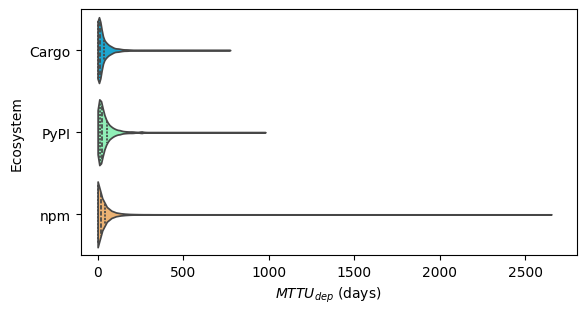

In [9]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
# Reorder the violin plots to show CARGO, PYPI, NPM
custom_order = ['CARGO', 'PYPI', 'NPM']
df_tood['system_name'] = pd.Categorical(df_tood['system_name'], custom_order)

# Create a mapping dictionary for the display names
name_mapping = {'CARGO': 'Cargo', 'PYPI': 'PyPI', 'NPM': 'npm'}
df_tood['system_name'] = df_tood['system_name'].map(name_mapping)


ax = sns.violinplot(data=df_tood, x='mttu_expo_weighted', y='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu"), "mttu_avg_expo.pdf")

ax.set_xbound(-100, 2800)
ax.set_xlabel('$MTTU_{dep}$ (days)')
ax.set_ylabel('Ecosystem')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')